<figure>
  <IMG SRC="Logo.png"  WIDTH=150 ALIGN="right">
</figure>

## Projections of mean sea level and tides<br>
### Six Dutch stations
<b>Prepared by: H.G. Voortman</b>


<figure>
    <IMG SRC="https://www.python.org/static/community_logos/python-powered-w-200x80.png"  WIDTH=100 ALIGN="right">
</figure>

#### Description
- Showing examples of effects in the North Sea

#### References
- Provided in report

#### Packages

In [38]:
# General packages
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sq
import numpy as np
#import scipy.signal as signal
#import datetime as dt
import hvec_stat.general_fit as gf
#import hvec_stat.gof as gof
import hvec_stat.support as sup
import models as mdl

In [39]:
# Settings
plt.rcParams['axes.grid'] = True
figsize = (20, 18)

#### Connect databases and import data

##### Processed data Rijkswaterstaat

In [40]:
# Connect database
conn_str = os.getenv('DATAPATH') + 'RWS_processed.db'
cnxn = sq.connect(conn_str, detect_types = True)

In [41]:
pd.read_sql('SELECT * FROM sqlite_master', cnxn)

,type,name,tbl_name,rootpage,sql
0,table,const_yr,const_yr,2,"CREATE TABLE ""const_yr"" (\n""naam"" TEXT,\n ""le..."
1,index,ix_const_yr_naam_level_1,const_yr,3,"CREATE INDEX ""ix_const_yr_naam_level_1""ON ""con..."


In [42]:
# Read table with observed water levels; complete years only
sql = (
    "SELECT * "
    "FROM 'const_yr' "
    "WHERE naam IN ('Delfzijl', 'Harlingen', "
    "'Den Helder', 'IJmuiden',  "
    "'Hoek van Holland', 'Vlissingen') "
    "AND (count>650) "
#    "AND (set == 'Ftested3') "
)
df = pd.read_sql(sql, cnxn) #.groupby('YEAR').mean()

In [43]:
cnxn.close()

In [44]:
df.columns = df.columns.str.replace('_ampl', '')
df.columns

Index(['naam', 'level_1', 'z0', 'zmean', 'count', 'M2', 'S2', 'Rsq_adj',
       'MHWS', 'MLWS', 'MHWN', 'MLWN', 'year', 'year_start', 'set', 'M4', 'O1',
       'K2', 'K1', 'P1', 'N2', 'M6', 'MU2', 'L2', '2MS6', 'MS4', 'NU2', 'SA'],
      dtype='object')

In [45]:
#df = df[np.abs(df['z0']) < 1e2]
#df = df[np.abs(df['M2']) < 1e2]
df = df[df['year'].between(1945, 2005)]

In [46]:
names = [
    'Delfzijl',
    'Harlingen',
    'Den Helder',
    'IJmuiden',
    'Hoek van Holland',
    'Vlissingen'
]

In [47]:
df = df[df['set'] == 'Ftested3']

#### Show graphs

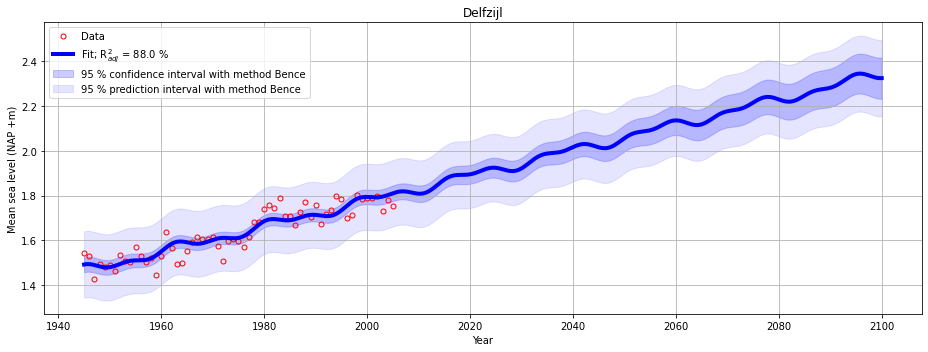

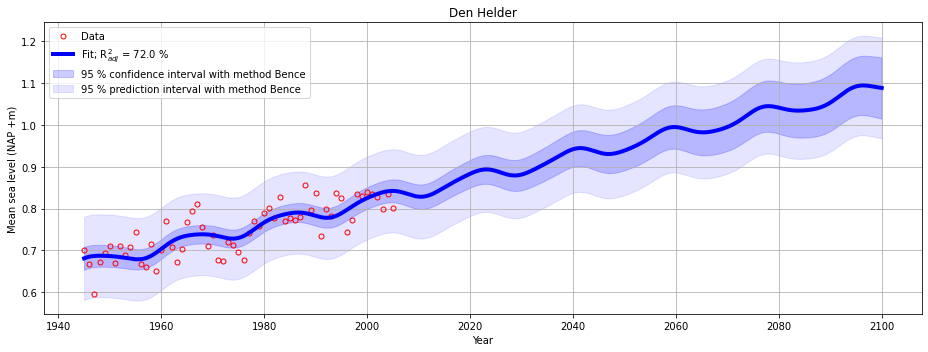

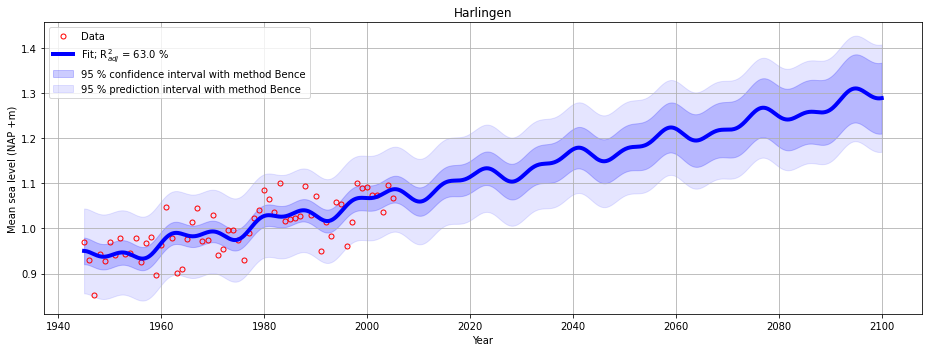

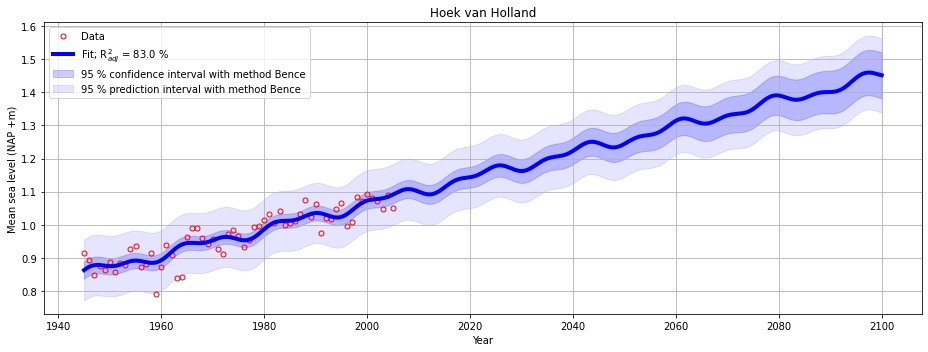

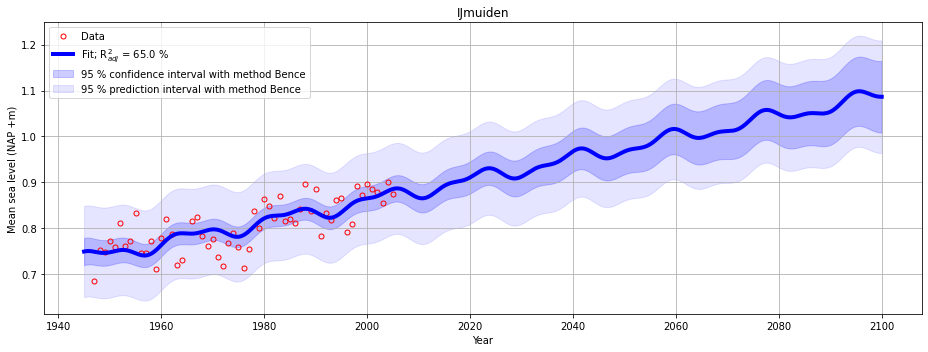

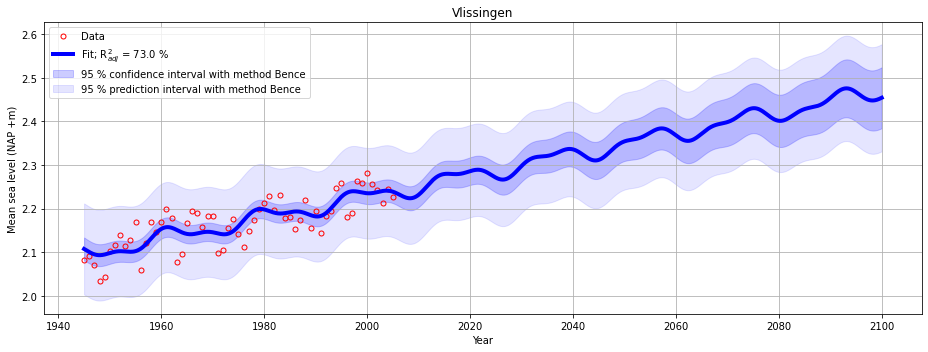

In [59]:
xgr = np.linspace(1945, 2100, 1000)
for nm in df['naam'].unique():
    data = df[df['naam'] == nm]
    gf.plot_general_fit(
        mdl.model3c, xgr, data['year'], data['MHWS'],
        pred_int = True,
        xlabel = 'Year', ylabel = 'Mean sea level (NAP +m)',
        title = nm, size = (13,5), method = 'Bence'
    )
    

#### Testing models

In [50]:
res = df.groupby('naam').apply(
    lambda df: sup.Ftest_classic_direct(
        f = mdl.model1,
        k = 2,
        xdata = df['year'],
        ydata = df['MHWS'], method = 'Bence'
    )['p'] * 100
)

In [51]:
res

naam
Delfzijl            1.203548e-07
Den Helder          1.872127e-05
Harlingen           2.152080e-05
Hoek van Holland    9.937258e-10
IJmuiden            5.588318e-04
Vlissingen          6.292883e-04
dtype: float64

In [52]:
res = df.groupby('naam').apply(
    lambda df: sup.Ftest_reduced_direct(
        mdl.model2, mdl.model1,
        kfull = 3, kred = 2,
        xdata = df['year'],
        ydata = df['MHWS'], method = 'Bence'
    )['p'] * 100
)
res

naam
Delfzijl            95.367157
Den Helder          99.721840
Harlingen           92.166026
Hoek van Holland    82.790244
IJmuiden            20.755041
Vlissingen          77.286795
dtype: float64

In [53]:
res = df.groupby('naam').apply(
    lambda df: sup.Ftest_reduced_direct(
        mdl.model3a, mdl.model1,
        kfull = 4, kred = 2,
        xdata = df['year'],
        ydata = df['MHWS'], method = 'Bence'
    )['p'] * 100
)
res

naam
Delfzijl            70.007144
Den Helder          99.399362
Harlingen           62.260753
Hoek van Holland    67.020123
IJmuiden            83.818681
Vlissingen          82.216683
dtype: float64

In [54]:
res = df.groupby('naam').apply(
    lambda df: sup.Ftest_reduced_direct(
        mdl.model3b, mdl.model1,
        kfull = 4, kred = 2,
        xdata = df['year'],
        ydata = df['MHWS'], method = 'Bence'
    )['p'] * 100
)
res

naam
Delfzijl            42.029925
Den Helder          17.184163
Harlingen           20.109543
Hoek van Holland    31.900474
IJmuiden            33.873379
Vlissingen          24.184515
dtype: float64

In [55]:
res = df.groupby('naam').apply(
    lambda df: sup.Ftest_reduced_direct(
        mdl.model3c, mdl.model3b,
        kfull = 6, kred = 4,
        xdata = df['year'],
        ydata = df['MHWS'], method = 'Bence'
    )['p'] * 100
)
res

naam
Delfzijl            68.386644
Den Helder          97.233320
Harlingen           50.197144
Hoek van Holland    57.909485
IJmuiden            74.356061
Vlissingen          68.445465
dtype: float64

#### End script
Prepared by HVEC lab, 2022